# 2-1. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

## (1) 데이터 가져오기

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## (2) 모델에 입력할 데이터 X 준비하기
## (3) 모델에 예측할 데이터 y 준비하기

In [2]:
df_X = diabetes['data']
df_y = diabetes['target']
print(type(df_X), df_X.shape)
print(type(df_y), df_y.shape)

<class 'numpy.ndarray'> (442, 10)
<class 'numpy.ndarray'> (442,)


## (4) train 데이터와 test 데이터로 분리하기

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## (5) 모델 준비하기

In [4]:
# 모델 함수
def model(X, W, b):
    predictions = 0
    for i in range(X.shape[1]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## (6) 손실함수 loss 정의하기

In [5]:
# MSE 계산 함수
def MSE(predictions, y):
    return ((predictions - y) ** 2).mean()  # 두 값의 차이의 제곱의 평균    
# 손실함수: MSE
def loss(X, W, b, y):
    predictions = model(X, W, b)
    return MSE(predictions, y)

## (7)기울기를 구하는 gradient 함수 구현하기

In [13]:
import matplotlib.pyplot as plt

# 기울기 함수
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
        
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db


'''
학습 함수
    학습률 및 횟수를 지정하여 학습 진행 및 시각화
    학습 결과 파라메터 W, b 반환
''' 
def linear_regression_fit(X, y, W, b, l_rate = 0.0001, cnt = 1000):    
    losses = []
    for i in range(1, (cnt + 1)):
        dW, db = gradient(X, W, b, y)
        W -= l_rate * dW
        b -= l_rate * db
        L = loss(X, W, b, y)
        losses.append(L)
        if i % 10 == 0:
            print('Iteration %d : Loss %0.4f' % (i, L))
    plt.plot(losses)
    plt.tight_layout()
    plt.show()
    return (W, b)

## (8) 하이퍼 파라미터인 학습률 설정하기
## (9) 모델 학습하기

Start(W, b): [0.03638257 0.19473419 0.98582181 0.36352998 0.74591397 0.85620587
 0.73777733 0.29760729 0.29204019 0.62814051] 0.9442153563058118
Iteration 10 : Loss 6253.4396
Iteration 20 : Loss 5911.4048
Iteration 30 : Loss 5834.7377
Iteration 40 : Loss 5763.3842
Iteration 50 : Loss 5694.2696
Iteration 60 : Loss 5627.2848
Iteration 70 : Loss 5562.3571
Iteration 80 : Loss 5499.4170
Iteration 90 : Loss 5438.3973


Iteration 100 : Loss 5379.2331
Iteration 110 : Loss 5321.8618
Iteration 120 : Loss 5266.2232
Iteration 130 : Loss 5212.2588
Iteration 140 : Loss 5159.9125
Iteration 150 : Loss 5109.1299
Iteration 160 : Loss 5059.8586
Iteration 170 : Loss 5012.0481
Iteration 180 : Loss 4965.6495
Iteration 190 : Loss 4920.6157
Iteration 200 : Loss 4876.9013
Iteration 210 : Loss 4834.4623
Iteration 220 : Loss 4793.2564
Iteration 230 : Loss 4753.2426
Iteration 240 : Loss 4714.3815
Iteration 250 : Loss 4676.6350
Iteration 260 : Loss 4639.9662
Iteration 270 : Loss 4604.3397
Iteration 280 : Loss 4569.7211
Iteration 290 : Loss 4536.0773
Iteration 300 : Loss 4503.3765
Iteration 310 : Loss 4471.5876
Iteration 320 : Loss 4440.6811
Iteration 330 : Loss 4410.6280
Iteration 340 : Loss 4381.4006
Iteration 350 : Loss 4352.9721
Iteration 360 : Loss 4325.3167
Iteration 370 : Loss 4298.4093
Iteration 380 : Loss 4272.2258
Iteration 390 : Loss 4246.7429
Iteration 400 : Loss 4221.9381
Iteration 410 : Loss 4197.7896
Iteratio

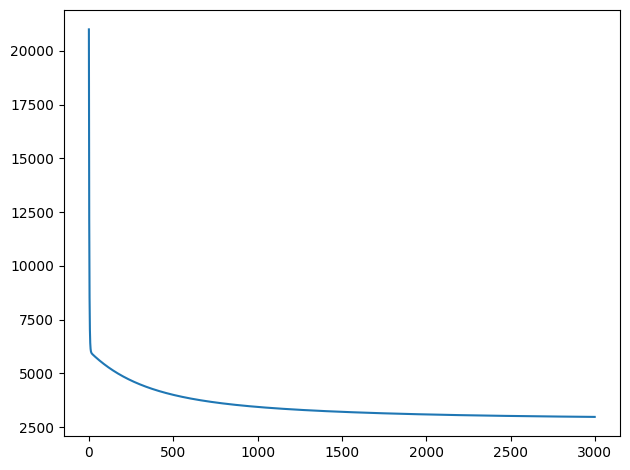

End(W, b): [  49.63018271 -151.32118064  447.07520609  296.01539146  -39.326118
  -85.58974353 -204.78885478  147.04808547  336.84367164  138.85371674] 151.54755649216594


In [14]:
import numpy as np

# 초기 파라메터: W 백터, b 상수
W = np.random.rand(X_train.shape[1])
b = np.random.rand()
print('Start(W, b):', W, b)

# 학습률
LEARNING_RATE = 0.1

# 학습
(W, b) = linear_regression_fit(X_train, y_train, W, b, LEARNING_RATE, 3000)
print('End(W, b):', W, b)


## (10) test 데이터에 대한 성능 확인하기

In [11]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print('mse:', mse)

mse: 2870.478681135662


## (11) 정답 데이터와 예측한 데이터 시각화하기

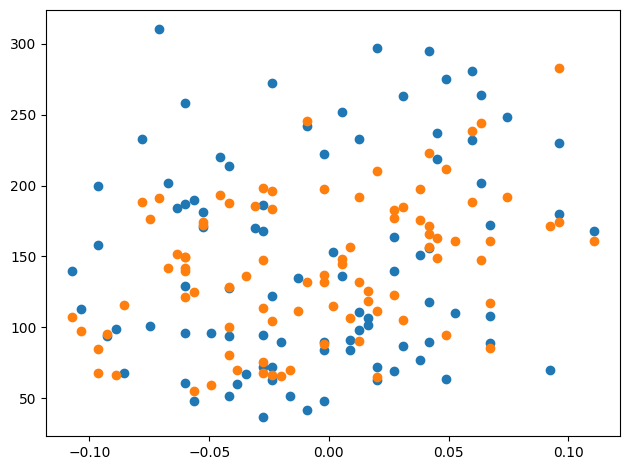

In [15]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.tight_layout()
plt.show()